# Exam v 3

### 4. 6 (5m)

Use broadcasting to create a grid of distances

Route 66 crosses the following cities in the US: Chicago, Springfield, Saint-Louis, Tulsa, Oklahoma City, Amarillo, Santa Fe, Albuquerque, Flagstaff, Los Angeles
The corresponding positions in miles are: 0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448

  * Construct a 2D grid of distances among each city along Route 66
  * Convert that in km (those savages...)

  1 miles = 1.609 km

In [10]:
import numpy as np
positions_miles = np.array([ 0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448])
distances_miles = np.abs(positions_miles.reshape(len(positions_miles), 1) - positions_miles)
print("distances in miles: \n", distances_miles, "\n")
mile_to_km = 1.60934
distances_km = mile_to_km * distances_miles
print("distances in km : \n", distances_km, "\n")

distances in miles: 
 [[   0  198  303  736  871 1175 1475 1544 1913 2448]
 [ 198    0  105  538  673  977 1277 1346 1715 2250]
 [ 303  105    0  433  568  872 1172 1241 1610 2145]
 [ 736  538  433    0  135  439  739  808 1177 1712]
 [ 871  673  568  135    0  304  604  673 1042 1577]
 [1175  977  872  439  304    0  300  369  738 1273]
 [1475 1277 1172  739  604  300    0   69  438  973]
 [1544 1346 1241  808  673  369   69    0  369  904]
 [1913 1715 1610 1177 1042  738  438  369    0  535]
 [2448 2250 2145 1712 1577 1273  973  904  535    0]] 

distances in km : 
 [[   0.       318.64932  487.63002 1184.47424 1401.73514 1890.9745
  2373.7765  2484.82096 3078.66742 3939.66432]
 [ 318.64932    0.       168.9807   865.82492 1083.08582 1572.32518
  2055.12718 2166.17164 2760.0181  3621.015  ]
 [ 487.63002  168.9807     0.       696.84422  914.10512 1403.34448
  1886.14648 1997.19094 2591.0374  3452.0343 ]
 [1184.47424  865.82492  696.84422    0.       217.2609   706.50026
  1189.30226 

### 3.1 BASH

### 6.1 Pandas TDC signals analysis  (1h)
#### Description
This exercise consists in analyzing a dataset containg timing information from a series of Time-to-Digital-Converters (TDC), implemented in a couple of FPGAs. Each measurement (i.e. each row of the input file) consists of:
- a flag that specifies the type of message ('HEAD', which in this case is always 1),
- two addresses of the TDC providing the signal ('FPGA' and 'TDC_CHANNEL')
- the timing information ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS'). 

    The triplet ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS') is a format for the time information analogous to ('hours', 'minutes', 'seconds'):
    - Each TDC count corresponds to 25/30 ns (**/ means division**),
    - Each BX_COUNTER corresponds to 25 ns,
    -  the ORBIT_CNT is increased every 'x' BX_COUNTER (with the value of x to be found)
    
This allows to store the time in a similar way to hours, minutes and seconds.

#### Requests

- 1\. Create a Pandas DataFrame reading N rows of the 'data_000637.txt' dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k.

- 2\. Find out the number of BX in a ORBIT (the value 'x').

- 3\. Find out how much the data taking lasted. You can either make an estimate based on the fraction of the measurements (rows) you read, or perform this check precisely by reading out the whole dataset.

- 4\. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information).

- 5\. Replace the values (all 1) of the HEAD column randomly with 0 or 1.

- 6\. Create a new DataFrame that contains only the rows with HEAD=1.

- 7\. Make two occupancy plots (one for each FPGA), i.e. plot the number of counts per TDC channel

- 8\. Use the groupby method to find out the noisy channels, i.e. the TDC channels with most counts (say the top 3)

- 9\. Count the number of unique orbits. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139

total rows: 1310720
Number of BX in ORBIT 3563 starting from 0 included
Lasting time of first 10000 observations in s 0.0089075
Lasting time total in s (estimate) 1.16752384
most popular channels with respective counts:  TDC_CHANNEL
139    860
63     499
64     491
Name: HEAD, dtype: int64
Number of unique orbits: 101
Number of unique orbits with at least one measurement from ch 139: 101


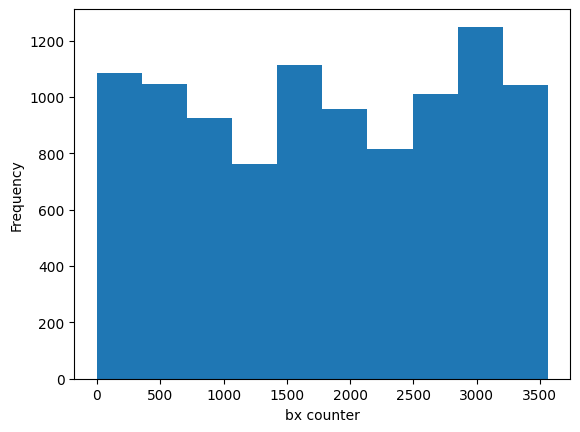

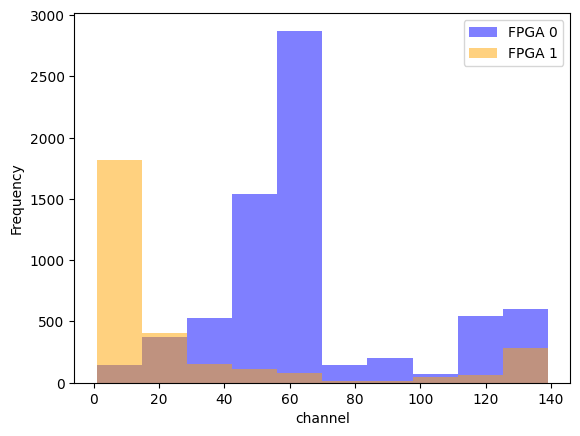

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy.random as npr

# 1
df = pd.read_csv("data_000637.txt")
total_rows = len(df)
print("total rows:" , total_rows )
N = np.min([total_rows, 10**4])
df = pd.read_csv("data_000637.txt", nrows = N)
# 2
df["BX_COUNTER"].plot(kind="hist")
plt.xlabel("bx counter")
x = df["BX_COUNTER"].max() - df["BX_COUNTER"].min()
print("Number of BX in ORBIT", x , "starting from 0 included" )
# 3
BX_to_ns = 25
#df["ORBIT_CNT"].plot(kind="hist")
norbits = df["ORBIT_CNT"].max() - df["ORBIT_CNT"].min()
norbits
lasting_time_ns = norbits * x * BX_to_ns 
lasting_time_s = lasting_time_ns * 10**-9 
print(f"Lasting time of first {N} observations in s", lasting_time_s)
print(f"Lasting time total in s (estimate)", lasting_time_s * (total_rows/N))

# 4
TDC_to_ns = 25/30
ORB_to_ns = BX_to_ns * x
df["time (ns)"] = ORB_to_ns * (df["ORBIT_CNT"] - df["ORBIT_CNT"].min()) + BX_to_ns * df["BX_COUNTER"] +TDC_to_ns * df["TDC_MEAS"]
# 5
df["HEAD"] = npr.choice([0, 1], size = len(df))
df.head()
# 6
new_df = df[df["HEAD"] == 1].copy()
# 7
plt.figure()
df[df["FPGA"] == 0]["TDC_CHANNEL"].plot(kind = "hist", label = "FPGA 0", color = "blue", alpha=0.5)
df[df["FPGA"] == 1]["TDC_CHANNEL"].plot(kind = "hist", label = "FPGA 1", color = "orange", alpha = 0.5)
plt.xlabel("channel")
plt.legend()
# 8
grouped = df.groupby("TDC_CHANNEL").count()
sorted_series = grouped["HEAD"].sort_values(ascending = False)
print("most popular channels with respective counts: " , sorted_series[0:3])
# 9
total_orbits = len(np.unique(df["ORBIT_CNT"]))
print("Number of unique orbits:", total_orbits)
df_prime = df[df["TDC_CHANNEL"] == 139].copy()
unique_orbits = len(np.unique(df_prime["ORBIT_CNT"]))
print("Number of unique orbits with at least one measurement from ch 139:", unique_orbits )

### 10.3\. Monte Carlo integration: hit/miss vs mean value method

Consider the function 

$$f(x) =\sin^2{\frac{1}{x(2-x)}}$$

* Compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one